# Continuous Control Model Training

---

In this notebook, I will train a Reinforcement Learning Agent to move a robotic arm so that it continuously follows a moving ball. In this environment, the simultaneous simulation of 20 arms will be used to train the agent.

### Import necessary packages

In [1]:
from unityagents import UnityEnvironment
import numpy as np
from agent import Agent
import matplotlib.pyplot as plt

### Start the continuous control environment

In [2]:
env = UnityEnvironment(file_name='./Reacher_Multi.app')

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		goal_speed -> 1.0
		goal_size -> 5.0
Unity brain name: ReacherBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 33
        Number of stacked Vector Observation: 1
        Vector Action space type: continuous
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


In [3]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### Examine the State and Action Spaces

In this environment, a double-jointed arm can move to target locations. A reward of `+0.1` is provided for each step that the agent's hand is in the goal location. Thus, the goal of the agent is to maintain its position at the target location for as many time steps as possible.

The observation space consists of `33` variables corresponding to position, rotation, velocity, and angular velocities of the arm.  Each action is a vector with four numbers, corresponding to torque applicable to two joints.  Every entry in the action vector must be a number between `-1` and `1`.

In [4]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space 
states = env_info.vector_observations
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
print('The state for the first agent looks like:', states[0])

Number of agents: 20
Size of each action: 4
There are 20 agents. Each observes a state with length: 33
The state for the first agent looks like: [ 0.00000000e+00 -4.00000000e+00  0.00000000e+00  1.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -4.37113883e-08  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -1.00000000e+01  0.00000000e+00
  1.00000000e+00 -0.00000000e+00 -0.00000000e+00 -4.37113883e-08
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  5.75471878e+00 -1.00000000e+00
  5.55726624e+00  0.00000000e+00  1.00000000e+00  0.00000000e+00
 -1.68164849e-01]


### Train the DDPG Agents

Now I train the agent to solve the environment using the Deep Deterministic Policy Gradients (DDPG) algorithm.

In [5]:
# initialize agent
agent = Agent(state_size=state_size, 
              action_size=action_size)

# train and get scores
scores, avg_scores = agent.train(env)

Episode 25	Average Score: 14.04
Episode 50	Average Score: 23.76
Episode 75	Average Score: 28.08
Episode 99	Score: 37.61	Average Score: 30.06
Environment solved in -1 episodes!	Average Score: 30.06


In [7]:
env.close()

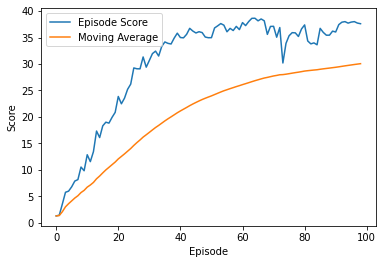

In [11]:
# plot the scores
plt.plot(np.arange(len(scores)), scores, label='Episode Score')
plt.plot(np.arange(len(scores)), avg_scores, label='Moving Average')
plt.ylabel('Score')
plt.xlabel('Episode')
plt.legend(loc='upper left');
plt.show()